# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_2 import *


In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP2 and creating Train, Validation and Test DataLoaders

len train:  718
len val:  179
len test:  75


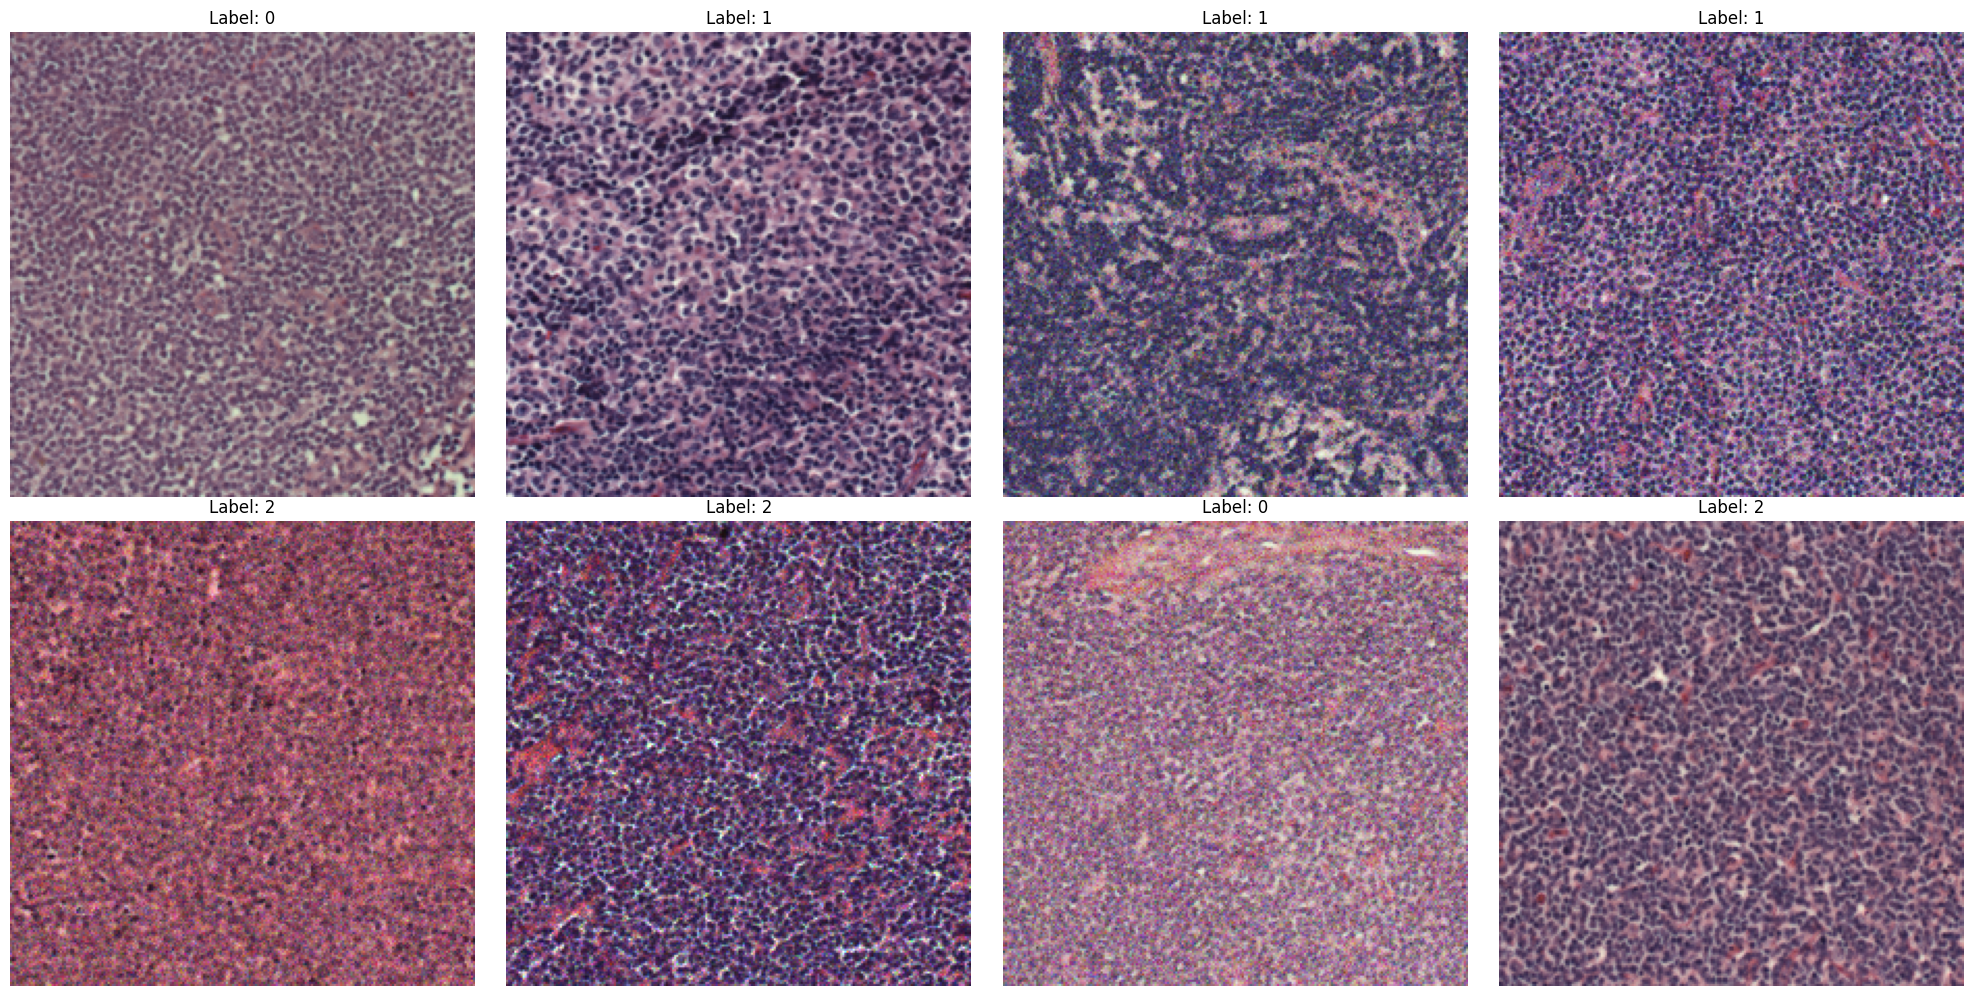

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP2.APP2, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 100MB/s]  


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app2.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.0231226380488998,--- Validation loss: 0.8927133383031663
Train Accuracy: 45.82%,--- Val Accuracy: 49.16%
--------------------------


Epoch [2/100] - Train loss: 0.8118962190609457,--- Validation loss: 0.7946012073388978
Train Accuracy: 59.33%,--- Val Accuracy: 62.01%
--------------------------


Epoch [3/100] - Train loss: 0.7422707006127721,--- Validation loss: 0.7922316173601417
Train Accuracy: 65.60%,--- Val Accuracy: 62.57%
--------------------------


Epoch [4/100] - Train loss: 0.6248592465368819,--- Validation loss: 0.5806012929484831
Train Accuracy: 71.87%,--- Val Accuracy: 74.30%
--------------------------


Epoch [5/100] - Train loss: 0.5345158462404873,--- Validation loss: 0.6774135631555952
Train Accuracy: 75.77%,--- Val Accuracy: 66.48%
--------------------------


Epoch [6/100] - Train loss: 0.48262535147680213,--- Validation loss: 0.5289139531178182
Train Accuracy: 79.39%,--- Val Accuracy: 78.77%
--------------------------


Epoch [7/100] -

# Plotting Result

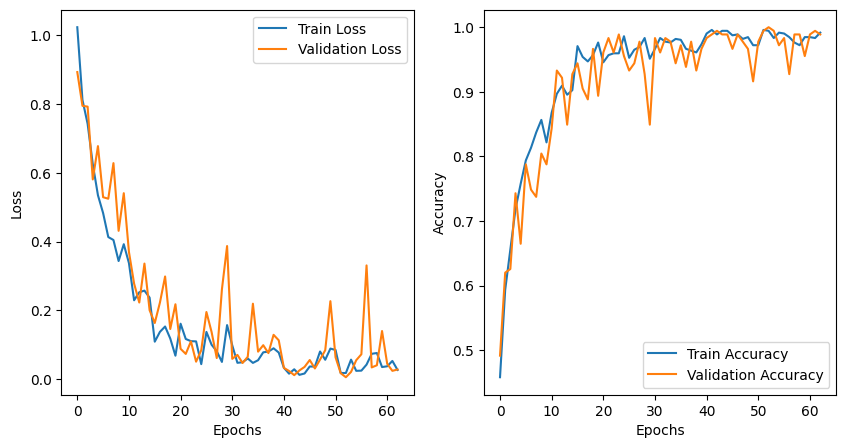

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.96      0.93      0.94        27
           2       0.86      0.95      0.90        19

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.95      0.95      0.95        75

Accuracy of the network on the test images: 94.67 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 158MB/s]


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app2.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.0125532464064595,--- Validation loss: 1.1072030600222795
Train Accuracy: 51.25%,--- Val Accuracy: 27.93%
--------------------------


Epoch [2/100] - Train loss: 0.7692844658508938,--- Validation loss: 0.866579589564041
Train Accuracy: 67.83%,--- Val Accuracy: 54.19%
--------------------------


Epoch [3/100] - Train loss: 0.5220508836521079,--- Validation loss: 0.4209754173982077
Train Accuracy: 79.81%,--- Val Accuracy: 81.56%
--------------------------


Epoch [4/100] - Train loss: 0.3204107391635023,--- Validation loss: 0.22440401860122575
Train Accuracy: 89.14%,--- Val Accuracy: 90.50%
--------------------------


Epoch [5/100] - Train loss: 0.24481621974025927,--- Validation loss: 0.22520992109895419
Train Accuracy: 91.50%,--- Val Accuracy: 91.06%
--------------------------


Epoch [6/100] - Train loss: 0.21783019448721308,--- Validation loss: 0.19693360939705173
Train Accuracy: 91.50%,--- Val Accuracy: 93.30%
--------------------------


Epoch [7/100

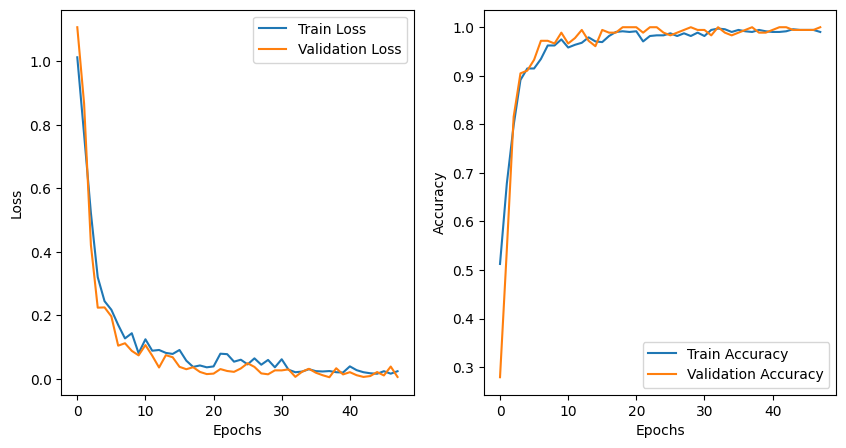

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      0.93      0.94        27
           2       0.90      0.95      0.92        19

    accuracy                           0.96        75
   macro avg       0.95      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

Accuracy of the network on the test images: 96.00 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 124MB/s] 


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app2.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.8287288895224463,--- Validation loss: 1.0607707180790396
Train Accuracy: 60.03%,--- Val Accuracy: 43.58%
--------------------------


Epoch [2/100] - Train loss: 0.47193810617691295,--- Validation loss: 0.45247068784756367
Train Accuracy: 82.03%,--- Val Accuracy: 82.68%
--------------------------


Epoch [3/100] - Train loss: 0.25809113042102216,--- Validation loss: 0.19999880064799133
Train Accuracy: 92.20%,--- Val Accuracy: 93.85%
--------------------------


Epoch [4/100] - Train loss: 0.17460784112676606,--- Validation loss: 0.11425936055582994
Train Accuracy: 94.85%,--- Val Accuracy: 96.09%
--------------------------


Epoch [5/100] - Train loss: 0.1325081373489667,--- Validation loss: 0.08543502460311911
Train Accuracy: 96.24%,--- Val Accuracy: 98.32%
--------------------------


Epoch [6/100] - Train loss: 0.09667502197341002,--- Validation loss: 0.0635796302835868
Train Accuracy: 96.94%,--- Val Accuracy: 98.88%
--------------------------


Epoch [7

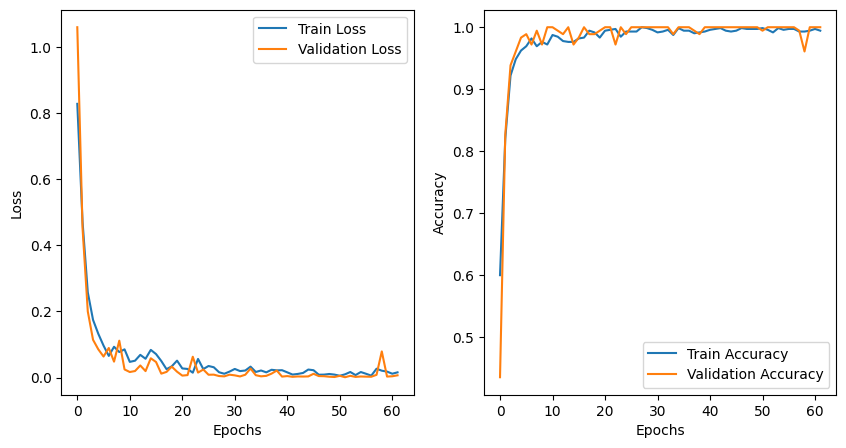

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.93      0.96        27
           2       0.95      1.00      0.97        19

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.97      0.97      0.97        75

Accuracy of the network on the test images: 97.33 %
